In [1]:
import numpy as np
import matplotlib.pyplot as plt
import quantecon as qe

print(np.random.rand(25))


[0.63074734 0.38538511 0.07816621 0.26052897 0.25333828 0.70248273
 0.954479   0.80859618 0.622132   0.25349786 0.73186199 0.71680664
 0.49453827 0.55221984 0.63937595 0.99382227 0.98628529 0.16871478
 0.77794932 0.55228813 0.57972667 0.27103327 0.01508792 0.47593756
 0.86111887]


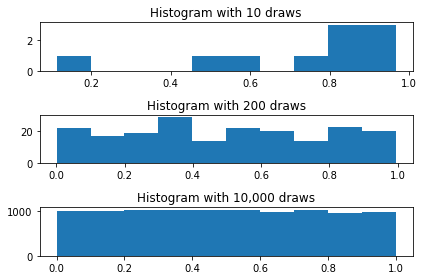

In [2]:
# Draw various numbers of uniform[0, 1] random variables
draws_10 = np.random.rand(10)
draws_200 = np.random.rand(200)
draws_10000 = np.random.rand(10_000)

# Plot their histograms
fig, ax = plt.subplots(3)

ax[0].set_title("Histogram with 10 draws")
ax[0].hist(draws_10)

ax[1].set_title("Histogram with 200 draws")
ax[1].hist(draws_200)

ax[2].set_title("Histogram with 10,000 draws")
ax[2].hist(draws_10000)

fig.tight_layout()

In [3]:
print(np.zeros((10,5) ))

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [4]:
# You'll see why we call it `_slow` soon :)
def simulate_loan_repayments_slow(N, r=0.05, repayment_full=25_000.0,
                                  repayment_part=12_500.0):
    repayment_sims = np.zeros(N)
    for i in range(N):
        x = np.random.rand()  # Draw a random number

        # Full repayment 75% of time
        if x < 0.75:
            repaid = repayment_full
        elif x < 0.95:
            repaid = repayment_part
        else:
            repaid = 0.0

        repayment_sims[i] = (1 / (1 + r)) * repaid

    return repayment_sims


In [5]:
def simulate_loan_repayments(N, r=0.05, repayment_full=25_000.0,
                             repayment_part=12_500.0):
    """
    Simulate present value of N loans given values for discount rate and
    repayment values
    """
    random_numbers = np.random.rand(N)

    # start as 0 -- no repayment
    repayment_sims = np.zeros(N)

    # adjust for full and partial repayment
    partial = random_numbers <= 0.20
    repayment_sims[partial] = repayment_part

    full = ~partial & (random_numbers <= 0.95)
    repayment_sims[full] = repayment_full

    repayment_sims = (1 / (1 + r)) * repayment_sims

    return repayment_sims

def simulate_year_of_loans(N=250, K=1000):

    # Create array where we store the values
    avg_repayments = np.zeros(K)
    for year in range(K):

        repaid_year = 0.0
        n_loans = simulate_loan_repayments(N)
        avg_repayments[year] = n_loans.mean()

    return avg_repayments

loan_repayment_outcomes = simulate_year_of_loans(N=250)

# Think about why we use the 5th percentile of outcomes to
# compute when we are profitable 95% of time
lro_5 = np.percentile(loan_repayment_outcomes, 5)

print("The largest loan size such that we were profitable 95% of time is")
print(lro_5)

The largest loan size such that we were profitable 95% of time is
19571.428571428576


In [6]:
def simulate_loan_lifetime(monthly_payment):

    # Create arrays to store outputs
    payments = np.zeros(12)
    # Note: dtype 'U12' means a string with no more than 12 characters
    statuses = np.array(4*["repaying", "delinquency", "default"], dtype="U12")

    # Everyone is repaying during their first month
    payments[0] = monthly_payment
    statuses[0] = "repaying"

    for month in range(1, 12):
        rn = np.random.rand()

        if (statuses[month-1] == "repaying"):
            if rn < 0.85:
                payments[month] = monthly_payment
                statuses[month] = "repaying"
            elif rn < 0.95:
                payments[month] = 0.0
                statuses[month] = "delinquency"
            else:
                payments[month] = 0.0
                statuses[month] = "default"
        elif (statuses[month-1] == "delinquency"):
            if rn < 0.25:
                payments[month] = monthly_payment
                statuses[month] = "repaying"
            elif rn < 0.85:
                payments[month] = 0.0
                statuses[month] = "delinquency"
            else:
                payments[month] = 0.0
                statuses[month] = "default"
        else:  # Default -- Stays in default after it gets there
            payments[month] = 0.0
            statuses[month] = "default"

    return payments, statuses
